This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [26]:
import pandas as pd 
import numpy as np
import datetime as dt

In [27]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
    
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
data

--2021-11-18 15:18:47--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-18 15:18:47--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca46a7b78d6b8c582cf80ccc6dc.dl.dropboxusercontent.com/cd/0/inline/BaOzwjdmsXnZkjWN-S03qf2vnJuTTQua18vQk3GjCNoTI_-G55T5q0kKOd8QLCDn7bCXsazr-iA6O4HK381eozUfriZ7CLAiOt4dPxApIrYeQrla71Aq6XECOIx589OYv2Hs50s5IKdafxRQ_E4zO1N5/file# [following]
--2021-11-18 15:18:47--  https://uca46a7b78d6b8c582cf80ccc6dc.dl.dropboxusercontent.com/cd/0/inline/BaOzwjdmsXnZkjWN-S03qf2vnJuTTQua18vQk3GjCNoTI_-G55T5q0kKOd8QLCDn7bCXsazr-iA6O4

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [28]:
N=15000
data1=pd.read_csv(file_name, nrows=N)
data1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9
14996,1,1,17,3869200316,3400,15
14997,1,1,10,3869200316,3530,16
14998,1,1,8,3869200316,3533,18


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [29]:
data['ORBIT_CNT/BX_COUNTER'] = data['ORBIT_CNT']/data['BX_COUNTER']

x= np.max(data['BX_COUNTER'])+1
print('x = ', x) #Having found maximum BX_COUNTER value on 1 milion entries, it's expected that the theshold to 
#add a unit to the ORBIT_CNT value is maximum+1 (1 is verified as minimum difference between BX_COUNTER values)

data 

x =  3564


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ORBIT_CNT/BX_COUNTER
0,1,0,123,3869200167,2374,26,1.629823e+06
1,1,0,124,3869200167,2374,27,1.629823e+06
2,1,0,63,3869200167,2553,28,1.515550e+06
3,1,0,64,3869200167,2558,19,1.512588e+06
4,1,0,64,3869200167,2760,25,1.401884e+06
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,5.077705e+06
1310716,1,1,4,3869211171,763,11,5.071050e+06
1310717,1,0,64,3869211171,764,0,5.064413e+06
1310718,1,0,139,3869211171,769,0,5.031484e+06


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [30]:
initial_time = data.loc[data.index[0], 'TDC_MEAS']*25/30 + data.loc[data.index[0], 'BX_COUNTER']*25 + data.loc[data.index[0], 'ORBIT_CNT']*25*x
final_time = data.loc[data.index[1310719], 'TDC_MEAS']*25/30 + data.loc[data.index[1310719], 'BX_COUNTER']*25 + data.loc[data.index[1310719], 'ORBIT_CNT']*25*x

print('Duration of data taking is: ', (final_time-initial_time)/10**9 , 's')

Duration of data taking is:  0.9804160933125 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [31]:
data['ABSOULTE TIME (ns)'] = (data['TDC_MEAS']*25/30 + data['BX_COUNTER']*25 + data['ORBIT_CNT']*25*x)

data 

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ORBIT_CNT/BX_COUNTER,ABSOULTE TIME (ns)
0,1,0,123,3869200167,2374,26,1.629823e+06,3.447457e+14
1,1,0,124,3869200167,2374,27,1.629823e+06,3.447457e+14
2,1,0,63,3869200167,2553,28,1.515550e+06,3.447457e+14
3,1,0,64,3869200167,2558,19,1.512588e+06,3.447457e+14
4,1,0,64,3869200167,2760,25,1.401884e+06,3.447457e+14
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,5.077705e+06,3.447467e+14
1310716,1,1,4,3869211171,763,11,5.071050e+06,3.447467e+14
1310717,1,0,64,3869211171,764,0,5.064413e+06,3.447467e+14
1310718,1,0,139,3869211171,769,0,5.031484e+06,3.447467e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [37]:
grouped_data = data.groupby('TDC_CHANNEL')['TDC_CHANNEL'].count().nlargest(3)

grouped_data

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [58]:
print('Number of non-empty orbits is: ', len(data.groupby('ORBIT_CNT')))

print("Number of unique orbits with at least one measureament from TDC_channel = 139: ", len(data[data["TDC_CHANNEL"]==139].groupby("ORBIT_CNT")))

Number of non-empty orbits is:  11001
Unique orbits with at least one measureament from TDC_channel = 139:  10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

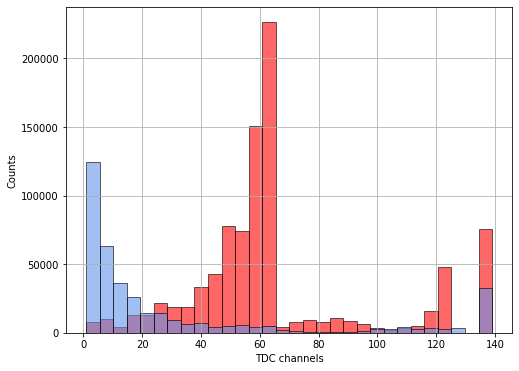

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.xlabel('TDC channels')
plt.ylabel('Counts')

FPGA_0 = data[data['FPGA']==0]
hist=FPGA_0['TDC_CHANNEL'].hist(bins = 30, alpha=0.6, color='red',edgecolor='black')

FPGA_1 = data[data['FPGA']==1]
hist1=FPGA_1['TDC_CHANNEL'].hist(bins = 30, alpha=0.6, color='cornflowerblue',edgecolor='black')

#plt.legend();